# RQ 3 Findings

Research Question 3 states:

***RQ3: What is the relationship between large language model use and computational literacy?***

This question investigated the relationship between the quantity of participant sessions classified as “learning” and “task completion” from the D1 dataset and their computational literacy scores (C1, C2).

### Alternate Hypothesis for H3

The quantity and classification of participant sessions in the D1 dataset are significantly correlated with their computational literacy scores (C1, C2). Specifically:

- There is a positive correlation between the quantity of sessions classified as “learning” and computational literacy scores.
- There is a negative correlation between the quantity of sessions classified as "task completion" and computational literacy scores.
### Null Hypothesis for H3

There is no statistically significant correlation between the quantity of participant sessions from the D1 dataset, whether classified as "learning" or "task completion," and their computational literacy scores (C1, C2).

## Methodology
To measure test-retest reliability a Pearson correlation will be measured against C1 and C2  (Vaz et al., 2013). To account for baseline computational literacy and test-retest effects from repeated administration of the same assessment from C1 to C2, 
I employed an analysis of covariance (ANCOVA). Specifically, I used linear regression with midterm computational literacy scores (C2) as the dependent variable with the baseline scores (C1), task completion session count, and learning session count as the independent variables  (Huitema, 2011). This approach controls for individual differences in prior knowledge as measured on C1 while examining whether usage patterns predict final outcomes beyond what would be expected from baseline ability alone (Maxwell et al., 2017).

I also conducted a supplementary analysis using the change in diagnostic scores (C2 - C1) as the dependent variable to examine whether LLM usage patterns predicted the magnitude of improvement. This was a complementary approach as change scores low reliability when pre- and post-test correlations are high (Cronbach & Furby, 1970). Both analyses together offered a comprehensive understanding of the relationship between LLM usage and computational literacy development.

**Methodological analysis with respect to H1:**

- The "learning" beta coefficient being positive with a p-value < 0.05, would indicate statistical significance. This implies there would be a positive correlation between the quantity of sessions classified as “learning” and computational literacy scores (C2).
- The “task completion” beta coefficient being negative with a p-value < 0.05 would imply a negative correlation between the quantity of sessions classified as "task completion" and computational literacy scores (C2).


Both conditions 1 and 2 must be satisfied to reject the null hypothesis for H3.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS

import seaborn as sns
from scipy import stats
import json
import import_ipynb
from IPython.display import display
# from analysis_with_ai import invoke_openrouter_ai, INTERACTION_PROMPT_TEMPLATEv2, classify_interaction
# from helper_functions import independent_ttest
from helper_functions import linear_regression_analysis, linear_regression_assumption_checks

In [2]:
# Read in the final data set
dataset = pd.read_csv("../datasets/dps-thesis-dataset.csv")
dataset.columns

Index(['participant_number', 'survey_done', 'chatbot_done', 'chatbot_group',
       'first_year', 'gender', 'year_in_school_simplified',
       'first_prog_course', 'C1', 'C2', 'E1', 'Difference_C2_C1',
       'inconclusive_session_count', 'learning_session_count',
       'task_completion_session_count', 'total_session_count',
       'total_interaction_count', 'interaction_to_session_ratio',
       'control_treatment_asnumber', 'first_prog_course_asnumber',
       'gender_asnumber', 'year_in_school_simplified_asnumber'],
      dtype='object')

### Descriptive Statistics for C1 and C2

Here are the descriptive statistics for the computational literacy scores at two time points, C1 (pre-test) and C2 (post-test):

**Things that stand out:**

- Similar means: The mean scores for C1 (M = 20.57) and C2 (M = 21.45) are quite close, indicating that on average, participants' computational literacy did not change significantly from pre-test to post-test.
- Highly correlated (common in Test-Retest scenairos): The Pearson correlation coefficient between C1 and C2 is r = 0.973, p < 0.001, indicating a strong positive correlation. This suggests that participants who scored high on the pre-test also tended to score high on the post-test. 


In [3]:
## descriptive statistics for C1 and C2 scores
display(dataset[['C1', 'C2']].describe().T)

# Correlation between C1 and C2
correlation = dataset['C1'].corr(dataset['C2'])

# Paired t-test
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(dataset['C1'], dataset['C2'])

# Effect size (Cohen's d for paired samples)
mean_diff = dataset['C2'].mean() - dataset['C1'].mean()
std_diff = (dataset['C2'] - dataset['C1']).std()
cohens_d = mean_diff / std_diff

print(f"Correlation between C1 and C2: {correlation}")
print(f"mean_diff: {mean_diff}, std_diff: {std_diff}")
print(f"Paired t-test: t-statistic = {t_stat}, p-value = {p_value}")
print(f"Cohen's d: {cohens_d}")

,count,mean,std,min,25%,50%,75%,max
C1,87.0,20.574713,4.714234,5.0,17.0,22.0,24.5,27.0
C2,87.0,21.448276,4.780675,8.0,20.0,23.0,25.0,28.0


Correlation between C1 and C2: 0.7933058629355612
mean_diff: 0.8735632183908031, std_diff: 3.053037365614886
Paired t-test: t-statistic = -2.6688357491249413, p-value = 0.009097125337403571
Cohen's d: 0.28612922600600604


## Regression Assumption Checks Model 1

Before conducting the regression analysis, several key assumptions were checked to ensure the validity of the results.


C2 ~ C1 + Task Completion + Learning

**Interpretation of Output**

Based on the regression assumption check output below the following observations were made:

- Initialyt, Flunks the Breusch-Pagan test for homoscedasticity (p < 0.05), indicating that the variance of the residuals is not constant across all levels of the independent variables. This violates the homoscedasticity assumption. Evident by the cone-shaped plots.
- Let's switch covariance type from "nonrobust" to "HC3" which allows for heteroscedasticity-robust standard errors. This adjustment helps to mitigate the impact of heteroscedasticity on the regression results.




--- Preparing Data for Linear Regression ---

Fitting model with robust standard errors (HC3)...
                            OLS Regression Results                            
Dep. Variable:                     C2   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     54.66
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.34e-19
Time:                        14:38:12   Log-Likelihood:                -212.33
No. Observations:                  87   AIC:                             432.7
Df Residuals:                      83   BIC:                             442.5
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------

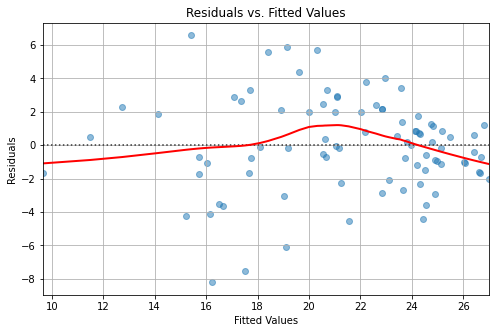

Interpretation of Residuals vs. Fitted Plot:
1. Linearity: The red line should be close to horizontal at 0. A curve indicates non-linearity.
2. Homoscedasticity: The points should be randomly scattered in a constant-width band. A funnel shape indicates heteroscedasticity.

--- ASSUMPTION 1: Linearity with Partial Regression Plots ---


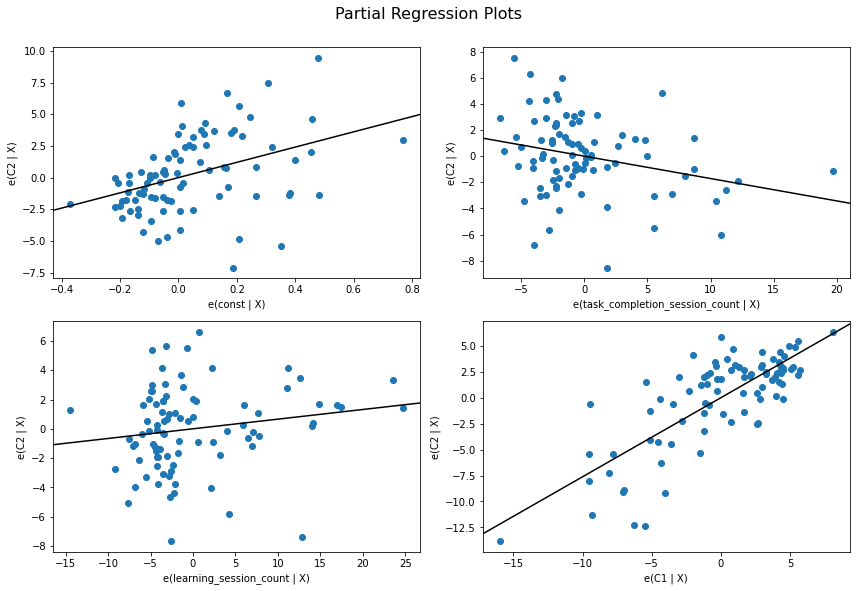

Interpretation: Each plot shows the relationship between y and one predictor,
holding other predictors constant. Look for a linear trend in each subplot.

--- ASSUMPTION 2: Homoscedasticity Test ---
❌ Breusch-Pagan Test: statistic=12.5788, p-value=0.0056
Interpretation of Breusch-Pagan Test:
 - p > 0.05 suggests homoscedasticity (constant variance)

--- ASSUMPTION 3: Checking Independence of Residuals (Autocorrelation) ---
✅ Durbin-Watson statistic: 2.22
Interpretation: The statistic ranges from 0 to 4.
- A value around 2.0 suggests no autocorrelation.
- Values < 1.5 suggest positive autocorrelation.
- Values > 2.5 suggest negative autocorrelation.

--- ASSUMPTION 4: Checking Normality of Residuals ---
✅ Shapiro-Wilk Test: statistic=0.9872, p-value=0.5513

Interpretation of Shapiro-Wilk Test:
 - p > 0.05 suggests residuals are normally distributed


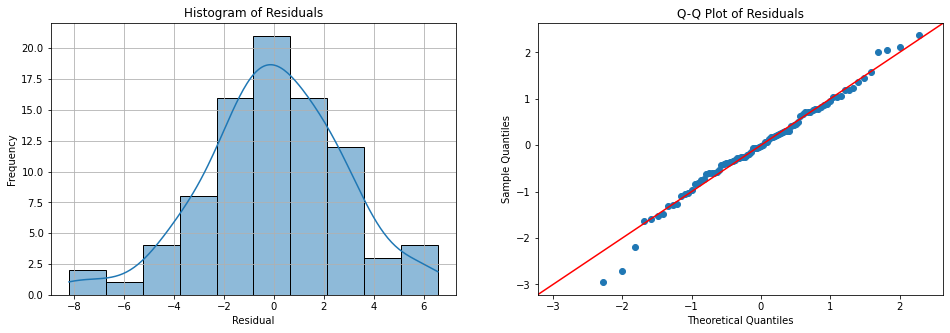

Interpretation:
1. Histogram: Should look like a bell curve.
2. Q-Q Plot: Points should fall along the 45-degree line.

--- ASSUMPTION 5: Checking for Multicollinearity ---
✅ VIF for task_completion_session_count: 1.2691
✅ VIF for learning_session_count: 1.1987
✅ VIF for C1: 1.0659

Interpretation of VIF:
- VIF = 1: No correlation
- 1 < VIF < 5: Moderate correlation, generally acceptable.
- VIF > 5 or 10: High correlation, indicating a multicollinearity problem.


In [6]:
ind_vars = ['task_completion_session_count', 'learning_session_count', 'C1']
dep_var = 'C2'

linear_regression_assumption_checks(dataset, ind_vars, dep_var, robust_std_errors=True)


## Model 1: Test-Retest Reliability and Usage Patterns Predicting C2

This section ran multiple regression for the Model with C2 as the dependent variable and C1 (covariate), learning session count, and task completion session count as independent variables.

C2 + Learning Session Count + Task Completion Count + C1

This was run with HC3 covariance type to account for heteroscedasticity.


**Interpretation of Output**

Based on the regression output below the following observations were made:

-  overall statistically significant
- C1 and task completion session count are statistically significant predictors of C2 when controlling for others.
- Learning session count is not a statistically significant predictor of C2 when controlling for others. But its REALLY CLOSE.... larger sample size might make it significant.



Fitting model with robust standard errors (HC3)...
********************************************************************************
INDEPENDENT VAR: ['task_completion_session_count', 'learning_session_count', 'C1']
DEPENDENT VAR  : C2
REGRESSORS     : 3
                            OLS Regression Results                            
Dep. Variable:                     C2   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     54.66
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.34e-19
Time:                        15:23:58   Log-Likelihood:                -212.33
No. Observations:                  87   AIC:                             432.7
Df Residuals:                      83   BIC:                             442.5
Df Model:                           3                                         
Covariance Type:                  

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable C2'>

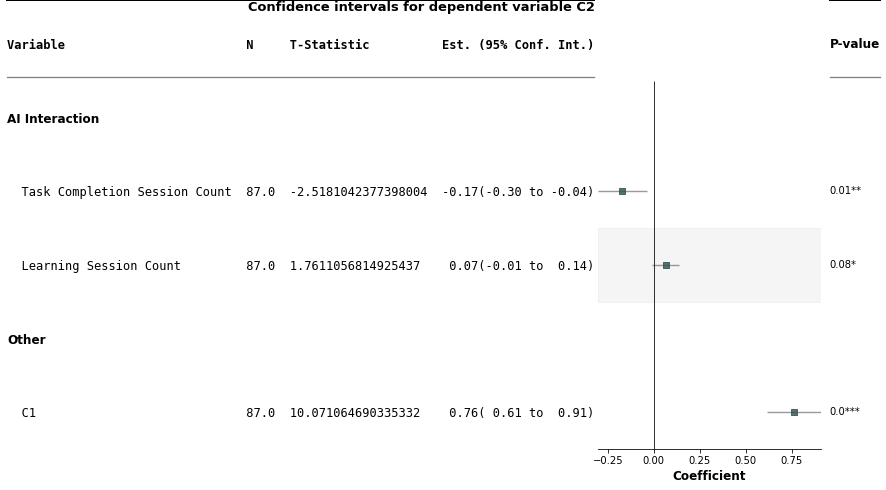

In [7]:
ind_vars = ['task_completion_session_count', 'learning_session_count', 'C1']
dep_var = 'C2'

linear_regression_analysis(dataset, ind_vars, dep_var, robust_std_errors=True)


## Model 1a: Change in Scores (Supplementary Analysis)

This section ran multiple regression for the Model 1a analysing the effect of the AI use on the change in computational literacy scores (C2 - C1) .

C2-C1 + Learning Session Count + Task Completion Count

This met all assumptions of linear regression. 

**Interpretation of Output**

Based on the regression output below the following observations were made:

-  overall statistically significant
- C1 and task completion session count are statistically significant predictors of C2 when controlling for others.
- Learning session count is not a statistically significant predictor of C2 when controlling for others. But its REALLY CLOSE.... larger sample size might make it significant.



Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['task_completion_session_count', 'learning_session_count']
DEPENDENT VAR  : Difference_C2_C1
REGRESSORS     : 2
                            OLS Regression Results                            
Dep. Variable:       Difference_C2_C1   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.572
Date:                Tue, 07 Oct 2025   Prob (F-statistic):              0.214
Time:                        16:00:31   Log-Likelihood:                -218.45
No. Observations:                  87   AIC:                             442.9
Df Residuals:                      84   BIC:                             450.3
Df Model:                           2                                         
Covariance Type:            nonrobust     

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable Difference_C2_C1'>

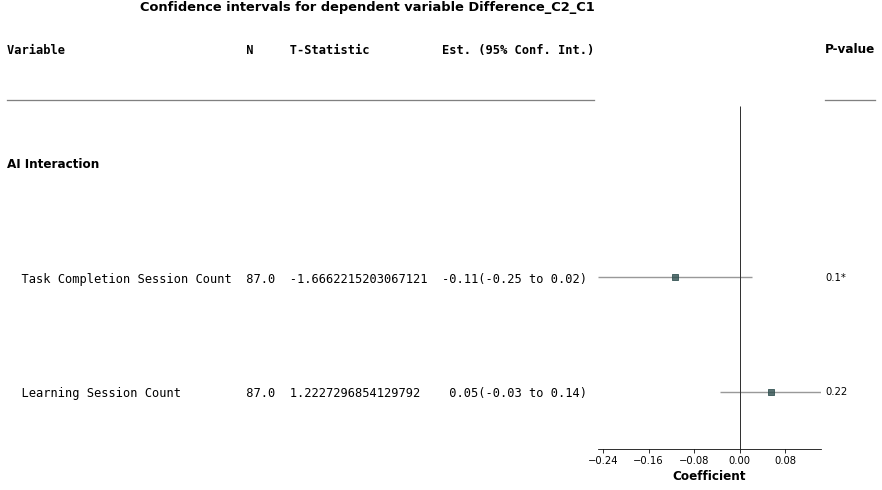

In [10]:
ind_vars = ['task_completion_session_count', 'learning_session_count']
dep_var = 'Difference_C2_C1'

linear_regression_analysis(dataset, ind_vars, dep_var)

## Tangent: Regression Assumption Checks Model 1a

Before conducting the regression analysis, several key assumptions were checked to ensure the validity of the results.

C2-C1 ~ Task Completion + Learning

**Interpretation of Output**

Based on the regression assumption check output below the following observations were made:

- meets all checks
- do I need to write it up? Hmm/



--- Preparing Data for Linear Regression ---

Fitting model with standard OLS...
                            OLS Regression Results                            
Dep. Variable:       Difference_C2_C1   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.572
Date:                Tue, 07 Oct 2025   Prob (F-statistic):              0.214
Time:                        15:26:30   Log-Likelihood:                -218.45
No. Observations:                  87   AIC:                             442.9
Df Residuals:                      84   BIC:                             450.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

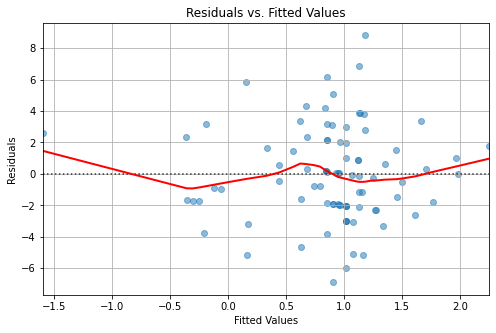

Interpretation of Residuals vs. Fitted Plot:
1. Linearity: The red line should be close to horizontal at 0. A curve indicates non-linearity.
2. Homoscedasticity: The points should be randomly scattered in a constant-width band. A funnel shape indicates heteroscedasticity.

--- ASSUMPTION 1: Linearity with Partial Regression Plots ---


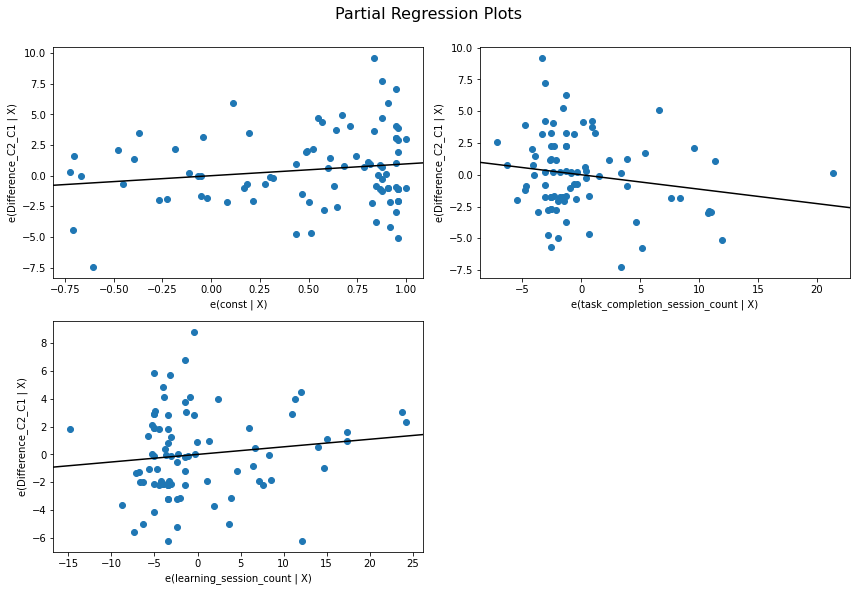

Interpretation: Each plot shows the relationship between y and one predictor,
holding other predictors constant. Look for a linear trend in each subplot.

--- ASSUMPTION 2: Homoscedasticity Test ---
✅ Breusch-Pagan Test: statistic=0.5652, p-value=0.7538
Interpretation of Breusch-Pagan Test:
 - p > 0.05 suggests homoscedasticity (constant variance)

--- ASSUMPTION 3: Checking Independence of Residuals (Autocorrelation) ---
✅ Durbin-Watson statistic: 1.97
Interpretation: The statistic ranges from 0 to 4.
- A value around 2.0 suggests no autocorrelation.
- Values < 1.5 suggest positive autocorrelation.
- Values > 2.5 suggest negative autocorrelation.

--- ASSUMPTION 4: Checking Normality of Residuals ---
✅ Shapiro-Wilk Test: statistic=0.9884, p-value=0.6375

Interpretation of Shapiro-Wilk Test:
 - p > 0.05 suggests residuals are normally distributed


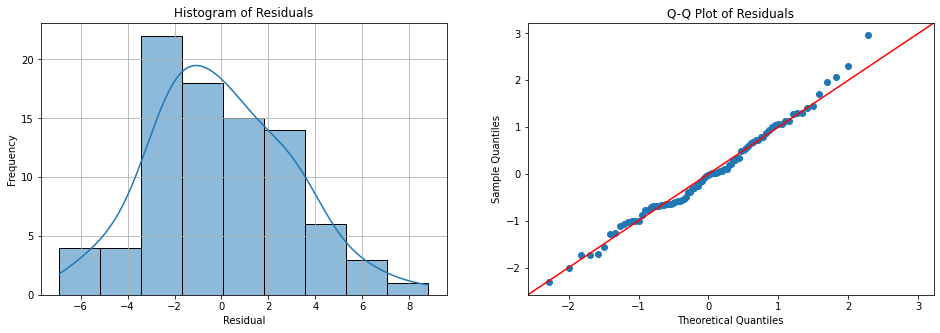

Interpretation:
1. Histogram: Should look like a bell curve.
2. Q-Q Plot: Points should fall along the 45-degree line.

--- ASSUMPTION 5: Checking for Multicollinearity ---
✅ VIF for task_completion_session_count: 1.1914
✅ VIF for learning_session_count: 1.1914

Interpretation of VIF:
- VIF = 1: No correlation
- 1 < VIF < 5: Moderate correlation, generally acceptable.
- VIF > 5 or 10: High correlation, indicating a multicollinearity problem.


In [9]:
ind_vars = ['task_completion_session_count', 'learning_session_count']
dep_var = 'Difference_C2_C1'

linear_regression_assumption_checks(dataset, ind_vars, dep_var)
